In [1]:
import os
import json
import time

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import torch
import torch.nn as nn
from torch.utils.data import DataLoader

import display
from dataset import NoisyLibriSpeechDataset, utils
from models import FCAE, CDAE, UNet
from train import set_device, train, evaluate

# Set compute device
device = set_device(verbose=True)

# Data params
srate = 16000
data_root = 'data/noised_synth_babble'
libri_root = 'data/LibriSpeech/dev-clean'
seed = 11
batch_size=8

N = 20
test_size = .10
conv = False

# Create dataset splits
train_idxs, val_idxs, test_idxs = utils.get_data_split_idxs(
    N, test_size=test_size, seed=seed)

# Load training data
data_train = NoisyLibriSpeechDataset(
    data_root=data_root, libri_root=libri_root,
    include_idxs=train_idxs, test=False,
    conv=conv, seed=seed)
train_dl = DataLoader(
    data_train, batch_size=batch_size,
    num_workers=0, pin_memory=False)

# Load validation data
data_val = NoisyLibriSpeechDataset(
    data_root=data_root, libri_root=libri_root,
    include_idxs=val_idxs, test=False,
    conv=conv, seed=seed)
val_dl = DataLoader(
    data_val, batch_size=batch_size,
    num_workers=0, pin_memory=False)

# Load testing data
data_test = NoisyLibriSpeechDataset(
    data_root=data_root, libri_root=libri_root,
    include_idxs=test_idxs, test=True,
    conv=conv, seed=seed)

display.show_split_sizes((data_train, data_val, data_test))

NameError: name 'set_device' is not defined

## Fully-Connected Autoencoder

In [2]:
# Model params
loss = nn.MSELoss()
epochs = 2
learning_rate = 0.01

# Create model and send to device
model = FCAE(
    data_train.target_shape,
    n_layers=4,
    z_dim=8).to(device)

# Train model
model, hist = train(
    device, model,
    train_dl, val_dl,
    epochs=epochs,
    learning_rate=learning_rate,
    criterion=loss)

# Plot Losses
fig, ax = plt.subplots(figsize=(10, 5))
ax = display.plot_losses(ax, hist, 'MSE')
fig.show()

# Evaluate Model
fig, axes = evaluate(device, model, data_test)
fig.show()

  1%|3                                     | 1/100 [00:14<23:50, 14.45s/it, avg. loss=0.0514, cur. loss=0.0514, avg. val. loss=0.00805, cur. val. loss=0.00805]

KeyboardInterrupt: 

## Convolutional Autoencoder

100%|##################################################| 2/2 [03:08<00:00, 94.49s/it, avg. loss=76.2, cur. loss=76.2, avg. val. loss=13.9, cur. val. loss=13.9]


Clean Signal


Noised Signal


Denoised Signal


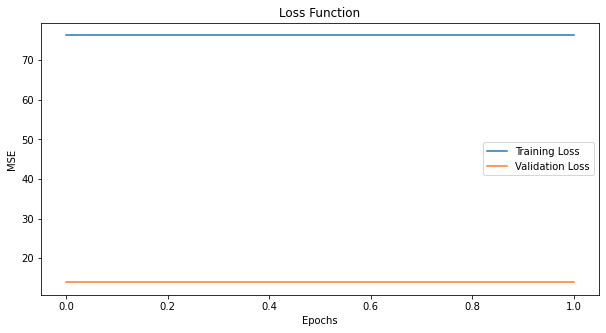

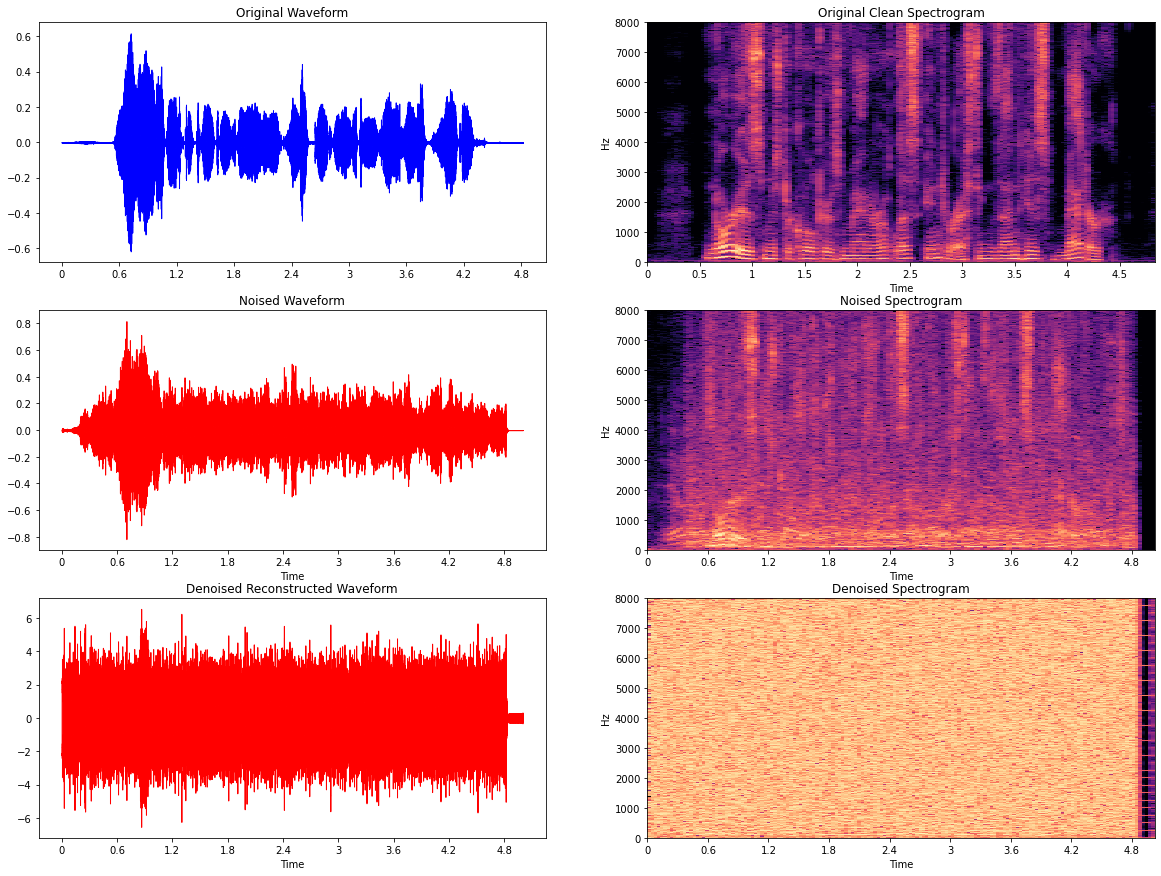

In [3]:
loss = nn.BCELoss()
epochs = 2
learning_rate = 0.01

model = CDAE(n_layers=4, z_dim=8, in_channels=1).to(device)
model, hist = train(
    device, model,
    train_dl, val_dl,
    epochs=epochs, 
    learning_rate=learning_rate,
    criterion=loss)

# Plot Losses
fig, ax = plt.subplots(figsize=(10, 5))
ax = plot_losses(ax, hist, 'MSE')
fig.show()

# Evaluate Model
fig, axes = evaluate(device, model, data_test)
fig.show()

## U-Net

In [ ]:
loss = nn.BCELoss()
epochs = 1
learning_rate = 0.01

model = UNet(up_mode='upsample', in_channels=1, n_classes=1).to(device)
model, hist = train(
    device, model,
    train_dl, val_dl,
    epochs=epochs, 
    learning_rate=learning_rate,
    criterion=loss)

# Plot Losses
fig, ax = plt.subplots(figsize=(10, 5))
ax = plot_losses(ax, hist, 'MSE')
fig.show()

# Evaluate Model
fig, axes = evaluate(device, model, data_test)
fig.show()